In [1]:
# Importing all the libraries needed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

## 1. Loading data and preprocessing it

In [2]:
# loading the pictures of tomatoes

train_data_dir = 'data/tomato/train'
test_data_dir = 'data/tomato/val' #this folder will be used for evaluating model's perfomance

In [3]:
# for this challenge we are using ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)# specifying the validation split inside the function

test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [4]:
train_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 7000 images belonging to 10 classes.


In [5]:
val_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 3000 images belonging to 10 classes.


In [6]:
test_gen = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False) #shuffle will not affect the accuracy of the model, but will affect the computation of some metrics that depend on the order of the samples

Found 1000 images belonging to 10 classes.


## 1a. Building a CNN model with a learning rate of 0.001

In [7]:
# CNN model layers

cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers. Conv2D (64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))
#output layer
cnn.add(layers.Dense(10,activation='softmax'))

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [9]:
opt = keras.optimizers.Adam(learning_rate=1e-4)

In [10]:
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

Before training the model, let's define an Early Stopping to avoid oferfitting.

In [11]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 20, 
                   verbose = 1, 
                   restore_best_weights = True)

In [12]:
history = cnn.fit(x = train_gen,
                    callbacks = [es], 
                    steps_per_epoch = 7000/32,
                    epochs = 100,
                    validation_steps = 3000/32,
                    validation_data = val_gen)  

Epoch 1/100
218/218 [==============================] - 104s 472ms/step - loss: 2.0094 - accuracy: 0.2470 - val_loss: 1.6288 - val_accuracy: 0.4167
Epoch 2/100
218/218 [==============================] - 93s 425ms/step - loss: 1.3841 - accuracy: 0.4979 - val_loss: 1.3873 - val_accuracy: 0.4973
Epoch 3/100
218/218 [==============================] - 93s 426ms/step - loss: 1.0826 - accuracy: 0.6131 - val_loss: 1.0738 - val_accuracy: 0.6123
Epoch 4/100
218/218 [==============================] - 92s 421ms/step - loss: 0.8977 - accuracy: 0.6789 - val_loss: 0.8356 - val_accuracy: 0.6960
Epoch 5/100
218/218 [==============================] - 93s 425ms/step - loss: 0.7740 - accuracy: 0.7241 - val_loss: 0.7037 - val_accuracy: 0.7447
Epoch 6/100
218/218 [==============================] - 93s 426ms/step - loss: 0.6933 - accuracy: 0.7500 - val_loss: 0.6049 - val_accuracy: 0.7713
Epoch 7/100
218/218 [==============================] - 95s 435ms/step - loss: 0.6287 - accuracy: 0.7716 - val_loss: 0.7112 

In [14]:
scores = cnn.evaluate(test_gen)

18/32 [===============>..............] - ETA: 3s - loss: 0.4219 - accuracy: 0.9080

UnknownError: Graph execution error:

FileNotFoundError: [Errno 2] No such file or directory: 'data/tomato/val\\Tomato___Spider_mites Two-spotted_spider_mite\\Tomato___Spider_mites Two-spotted_spider_mite_original_00fa99e8-2605-4d72-be69-98277587d84b___Com.G_SpM_FL 1453.JPG_5a4912ea-1fce-46e0-a929-f5b66622fc78.JPG'
Traceback (most recent call last):

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\keras\engine\data_adapter.py", line 903, in wrapped_generator
    for data in generator_fn():

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\keras\engine\data_adapter.py", line 1050, in generator_fn
    yield x[i]

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\keras\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\keras\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\keras\utils\image_utils.py", line 422, in load_img
    with open(path, "rb") as f:

FileNotFoundError: [Errno 2] No such file or directory: 'data/tomato/val\\Tomato___Spider_mites Two-spotted_spider_mite\\Tomato___Spider_mites Two-spotted_spider_mite_original_00fa99e8-2605-4d72-be69-98277587d84b___Com.G_SpM_FL 1453.JPG_5a4912ea-1fce-46e0-a929-f5b66622fc78.JPG'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_2316]

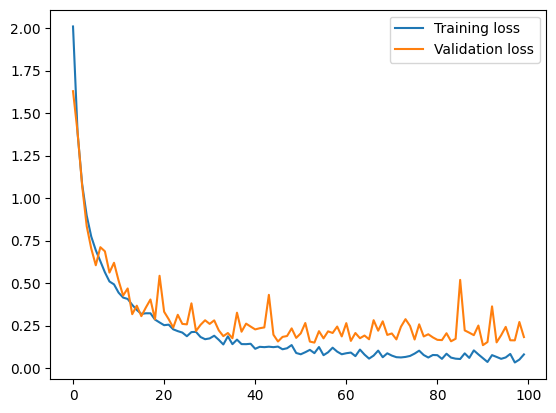

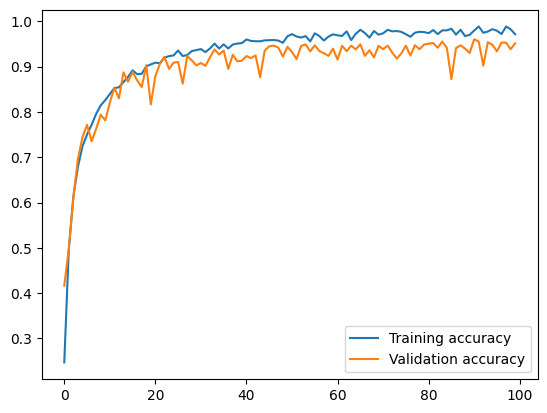

In [15]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [16]:
# don't forget to save your model for later
cnn.save('cnn.h5')

Making predictions, confusion matrix, metrics.

In [17]:
test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)

C:\Users\Javi\AppData\Local\Temp\ipykernel_10580\2245222372.py:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)


In [18]:
# Predict classes
predictions = cnn.predict(test_gen, steps=test_steps_per_epoch)

18/32 [===============>..............] - ETA: 3s

UnknownError: Graph execution error:

FileNotFoundError: [Errno 2] No such file or directory: 'data/tomato/val\\Tomato___Spider_mites Two-spotted_spider_mite\\Tomato___Spider_mites Two-spotted_spider_mite_original_00fa99e8-2605-4d72-be69-98277587d84b___Com.G_SpM_FL 1453.JPG_5a4912ea-1fce-46e0-a929-f5b66622fc78.JPG'
Traceback (most recent call last):

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\keras\engine\data_adapter.py", line 903, in wrapped_generator
    for data in generator_fn():

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\keras\engine\data_adapter.py", line 1050, in generator_fn
    yield x[i]

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\keras\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\keras\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "c:\Users\Javi\anaconda3\envs\leaf\lib\site-packages\keras\utils\image_utils.py", line 422, in load_img
    with open(path, "rb") as f:

FileNotFoundError: [Errno 2] No such file or directory: 'data/tomato/val\\Tomato___Spider_mites Two-spotted_spider_mite\\Tomato___Spider_mites Two-spotted_spider_mite_original_00fa99e8-2605-4d72-be69-98277587d84b___Com.G_SpM_FL 1453.JPG_5a4912ea-1fce-46e0-a929-f5b66622fc78.JPG'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_predict_function_129479]

In [19]:
predictions[1]

NameError: name 'predictions' is not defined

In [20]:
predicted_classes = np.argmax(predictions,axis=1)

NameError: name 'predictions' is not defined

In [21]:
# Get ground-truth classes and class-labels
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

In [22]:
# Print confusion matrix
confusion_matrix = confusion_matrix(test_gen.classes, predicted_classes)
print(confusion_matrix)

NameError: name 'predicted_classes' is not defined

In [23]:
# To check F1 score, recall etc.
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

NameError: name 'predicted_classes' is not defined